## 1. 퍼셉트론
### 퍼셉트론
다수의 신호를 입력으로 받아 하나의 신호를 출력한다. 출력은 1이나 0 두가지 값을 가질 수 있다.
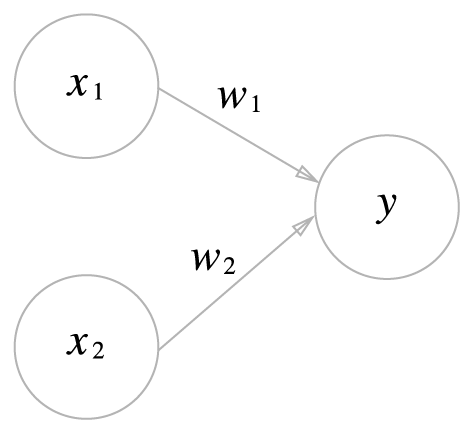

해당 그림과 같이 ${x_1}$,$ {x_2}$는 입력 신호이고 ${y}$는 출력, ${w_1}$, ${w_2}$는 가중치이다. 입력 신호가 뉴런에 보내질 때는 각각의 고유한 가중치가 곱해지고 이 신호의 총합이 정해진 한계를 넘어설 때(임계값)만 1을 출력한다. 기호로 표현하면 $\theta$ 이다.

## 2. 논리회로
### And 게이트
${x_1}$ 과 ${x_2}$ 모두가 1일 때에만 가중 신호의 총합이 주어진 임계 값을 웃돌 수 있다.

${x_1}$|${x_2}$|y
----|----|----
0|0|0
1|0|0
0|1|0
1|1|1

### NAND 게이트
Not AND를 의미하고 동작은 AND 게이트의 출력을 뒤집은 것을 의미한다.
${x_1}$|${x_2}$|y
----|----|----
0|0|1
1|0|1
0|1|1
1|1|0

### OR 게이트
입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로이다.
${x_1}$|${x_2}$|y
----|----|----
0|0|0
1|0|1
0|1|1
1|1|1

## 3. 퍼셉트론 구현하기
간단한 구현 방식

In [ ]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1

print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


가중치와 편향 도입

In [ ]:
import numpy as np
x = np.array([0,1])
w = np.array([0.5, 0.5])
b = -0.7
print(w*x)
print(np.sum(w*x))
print(np.sum(w*x)+b)

[0.  0.5]
0.5
-0.19999999999999996


가중치와 편향 구현하기

In [ ]:
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7

  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5]) #w와 b가 부호가 반대가 된다.
  b = 0.7

  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2 #가중치만 다르다

  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

### 퍼셉트론의 한계
XOR 게이트는 배타적 논리합이라는 논리 회로이다. ${x_1}$, ${x_2}$ 중 한쪽이 1일 때만 1을 출력한다. 세모와 원으로 구분하려면 그림과 같이 비선형적인(곡선) 형태로만 가능하다. 선형적인(직선)으로는 불가능한 것이다.

${x_1}$|${x_2}$|y
----|----|----
0|0|0
1|0|1
0|1|1
1|1|0

  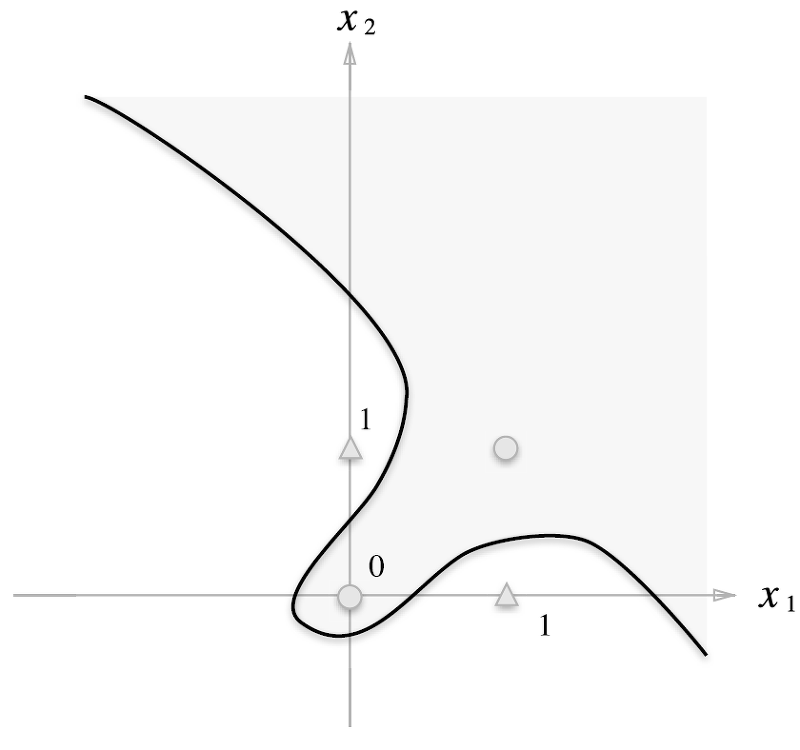

## 5. 다층 퍼셉트론의 등장
단층 퍼셉트론으로는 XOR 게이트를 표현할 수 없다. 하지만 층을 쌓아서 다층 퍼셉트론을 만들면 가능해진다. 앞에서 진행한 AND, OR, NAND 게이트를 조합해서 가능하다. ${x_1}$, ${x_2}$는 NAND와 OR의 입력이되고 NAND와 OR의 출력이 AND 게이트의 입력으로 이어진다. 다층 구조인 것이다.

${x_1}$|${x_2}$|${s_1}$|${s_2}$|y
----|----|----|----|----|
0|0|1|0|0
1|0|1|1|1
0|1|1|1|1
1|1|0|1|0

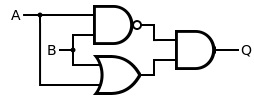

### XOR 게이트를 코드로 구현하기

In [ ]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)

  return y

print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


위처럼 XOR을 다층 구조의 네트워크를 통해 만들 수 있고 이러한 퍼셉트론을 다층 퍼셉트론이라고 한다. 단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 늘려 구현함으로서 더 다양한 것을 표현할 수 있다.
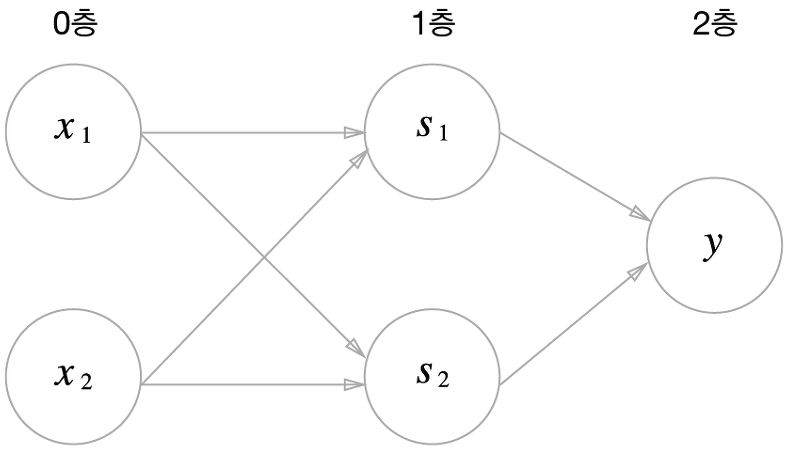